Z_HI=0.35
------dwarfs---------
lamint=0.00044634535519125684
merger rate dwarfs per cubic Gpc w Panter = 0.9070146186681587
lamint=0.00044634535519125684
merger rate dwarfs per cubic Gpc w AM13 = 0.9070146186681587
lamint=0.00044634535519125684
merger rate dwarfs per cubic Gpc w Tremonti = 0.9070146186681587
lamint=0.00044634535519125684
detection rate dwarfs per cubic Gpc with Panter = 3.9378189617244392
lamint=0.00044634535519125684
merger rate dwarfs per cubic Gpc w Zdwarf = 0.9070146186681587
lamint=0.00044634535519125684
detection rate dwarfs per cubic Gpc with Zdwarf = 9.070146186681587
lamint=0.00044634535519125684
detection rate dwarfs per cubic Gpc with AM13 = 0.8348626118397079
lamint=0.00044634535519125684
detection rate dwarfs per cubic Gpc with Tremonti = 2.2397940536630094
lamint=0.00044634535519125684
detection rate dwarfs per cubic Gpc with Lee = 1.6979550201149174


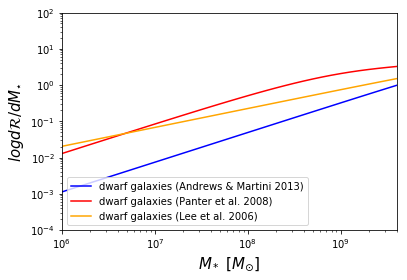

In [6]:
#!/opt/local/bin/python2.7 

# Here we will calculate both the merger rate and detection rate for HI disks for the various mass-metallicity relations (Panter et al. 08, Tremonti et al. 04) and using observational values and my C11 values, as well as dwarf galaxies using the Panter relation.  Below we use the Fontana et al. 2006 galaxy stellar mass function.

import numpy
import matplotlib.pyplot as pl
%matplotlib inline
import math
import sys

from numpy import loadtxt
from os import listdir

Brookscorr = -0.26

def phistar(z) :
    phi0 = 0.0035
    phi1 = -2.2
    return phi0*(1+z)**phi1

def fracM(M, z) :
    M0 = 11.16
    M1 = 0.17
    M2 = -0.07

    hatM = 1e1**(M0 + M1*z + M2*z*z)
    return M/hatM

def phi(M,z=0.) :
    alpha0 = -1.18
    alpha1 = -0.082
    alpha = alpha0 + alpha1*z
    return math.log(10.) * phistar(z)*fracM(M,z)**(1.+alpha) * numpy.exp( -fracM(M,z))

def PanterZ(lgMstar) :

    logMc = 9.66
    Delta = 1.04
    A = -0.452
    B = 0.572
    out = numpy.tanh((lgMstar - logMc)/Delta)
    arg = A + B*out
    return 10**arg

def lamfit(Ptless,Zint):
# will return interpolated fit for lambda (fitting to O17 and Lamberts et al. 2016) given Z_HI or Z_dwarf (Zint) -- 
    Z = numpy.arange(0.001,1.,0.01)
    a = 3.9007870e-09
    b = 1.4792985e-07
    lamfit = a*((1./Z)**3) +b
    lamfit = lamfit/Ptless
    int = numpy.interp(Zint,Z,lamfit)
    ## now impose floor:
    lamint = numpy.minimum(int,1.5e-4*1.e1)
    print ("lamint=" + str(lamint))
    return lamint

def Richlambda(Zint):
# will read in file form Richard and return interpolated lambda values at Zint    
    #filename = "dat_lambda_factor.txt"  # old file don't use                     
    filename = "dat_lambda_M40cut.txt" # should have mass cut > 40 Msun           
    #filename = "dat_lambda.txt" # new file but doesn't have mass cut      

    data = loadtxt(filename,
              dtype=([('Z', 'float'), ('lambda', 'float'), ('av_mc', 'float'), ('V', 'float')]))

    lam = data["lambda"]/1.e-3
    Z = data["Z"]/0.0134

    lamint = numpy.interp(Zint,Z,lam)
    print ("lamint=" + str(lamint))
    return lamint

def TremontiZ(lgMstar, corr = 0.):
    lgZ = -1.492 + 1.847*lgMstar - 0.08026*(lgMstar**2) - 8.69 +corr
    return 10**lgZ

def AM13Z(lgMstar,OHasym,Mto,gamma):
    Mstar = 10**lgMstar
    lgZ = OHasym - numpy.log10(1.+(Mto/Mstar)**gamma) - 8.69
    return 10**lgZ

def LeeZ(lgMstar):
    lgZ = 5.65 + 0.298*lgMstar - 8.66
    return 10**lgZ

def mratedwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,phi):
    #lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)                                          
    return (Zdwarf*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()


def mratedwarfZP(Mstar,SFRdwarf,Zdwarf,Ptless,dt,Zp,dlgM,Mhdwarf,phi) :

#    lmbda = lamfit(Ptless,Zp) # leads to weird plot
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZAM13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,phi) :

#    lmbda = lamfit(Ptless,ZAM13)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,phi) :

#    lmbda = lamfit(Ptless,ZTrem)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,phi) :

#    lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def detectrdwarfZp(Mstar,SFRdwarf,Zdwarf,Ptless,dt,Zp,dlgM,Mhdwarf,phi) :

#    lmbda = lamfit(Ptless,Zp)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/Zp)*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,phi) :

#    lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/Zdwarf)*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZAm13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,phi) :

#    lmbda = lamfit(Ptless,ZAM13)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZAM13)*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,phi) :

#    lmbda = lamfit(Ptless,ZTrem)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZTrem)*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,phi) :
#    lmbda = lamfit(Ptless,ZLee)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZLee)*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf)

####--------Set parameters and return merger rate, detection rate, and plots --------

ZHI = 0.35
print ("Z_HI=" + str(ZHI))

M51 = 3.98e10  ## from Leroy et al. 2008                                        

SFRM51 = 0.1 ## Bigiel et al. 2010, C11
ZM51 = 0.1  # C11
dt = 10.e9  # Bigiel et al. 2010

##lmbda USE FITTING FUNCTION DEFINED ABOVE IN LAMFIT
                                                 
Ptless = 1.e-3  # the fraction of black holes that merge within Hubble time
## figure out what to do for plots --- 
##NM51 = SFRM51*(1./ZM51)*lmbda*Ptless*dt

dlgM = 0.1
#lgMstar = numpy.arange(5,7,dlgM)
lgMstar = numpy.arange(5, 9.89, dlgM)
Mstar =1e1**lgMstar

phi = phi(Mstar,z=0)
ZTrem = TremontiZ(lgMstar,corr=-0.26)
ZPanter = PanterZ(lgMstar)
ZLee = LeeZ(lgMstar)

## from Andrews & Martini 2013:
#Mto = 10**32.65
#OHasym = 16.988
#gamma = 0.373
### first row for MZR in Table 4:
#Mto = 10**8.901
#OHasym = 8.798
#gamma = 0.64
### second row:
Mto = 8.253
OHasym = 8.726
gamma = 0.734
ZAM13 = AM13Z(lgMstar,OHasym,Mto,gamma)

###----------dwarf galaxy parameters ---------------

print ("------dwarfs---------")

Mhdwarf = 2.5e8  ## from O17 h516
SFRdwarf = 0.01
Zdwarf = 0.1
## the bigger one h603
# Mhdwarf = 7.8e9
# SFRdwarf = 1.
# Zdwarf = 0.4
### figure out plots -- 
###Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt

#mratedwarfZP = mratedwarfZP(Mstar, 0.0007, 0.23, Ptless, dt, ZAM13, dlgM, 1.8e6,phi )
mratedwarfZP= mratedwarfZP(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZPanter,dlgM,Mhdwarf,phi)
print ("merger rate dwarfs per cubic Gpc w Panter = " + str(mratedwarfZP*1e3**3/dt)) # conversion to Gpc-3 and rate                                                                  

mratedwarfZAM13= mratedwarfZAM13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,phi)
print ("merger rate dwarfs per cubic Gpc w AM13 = " + str(mratedwarfZAM13*1e3**3/dt)) 

mratedwarfZTrem= mratedwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,phi)
print ("merger rate dwarfs per cubic Gpc w Tremonti = " + str(mratedwarfZTrem*1e3**3/dt))

dratedwarfZP = detectrdwarfZp(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZPanter,dlgM,Mhdwarf,phi)
print ("detection rate dwarfs per cubic Gpc with Panter = " + str(dratedwarfZP.sum()*1e3**3/dt))
 
mratedwarfZdwarf= mratedwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,phi)
print ("merger rate dwarfs per cubic Gpc w Zdwarf = " + str(mratedwarfZdwarf*1e3**3/dt)) 

dratedwarfZdwarf = detectrdwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,phi)
print ("detection rate dwarfs per cubic Gpc with Zdwarf = " + str(dratedwarfZdwarf.sum()*1e3**3/dt))

dratedwarfZAM13 = detectrdwarfZAm13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,phi)
print ("detection rate dwarfs per cubic Gpc with AM13 = " + str(dratedwarfZAM13.sum()*1e3**3/dt))

dratedwarfZTrem = detectrdwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,phi)
print ("detection rate dwarfs per cubic Gpc with Tremonti = " + str(dratedwarfZTrem.sum()*1e3**3/dt))

dratedwarfZLee = detectrdwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,phi)
print ("detection rate dwarfs per cubic Gpc with Lee = " + str(dratedwarfZLee.sum()*1e3**3/dt))

#sys.exit()

### --------- now plots -------------
lmbda = 0.0015
NM51Kenn = SFRM51*(1./ZM51)*lmbda*Ptless*dt

#pl.loglog(Mstar,((numpy.minimum((Zdwarf/ZPanter)**2,1000.))*phi*dlgM*(Mstar/Mhdwarf)*Ndwarf),'red',label='dwarf galaxies (Panter et al. 2008)')
#pl.loglog(Mstar,(phi*dlgM*(Mstar/M51)*NM51*numpy.minimum(((ZM51/ZTrem)**2),1000.)),'blue',label='HI (Tremonti et al. 2004)')
#pl.loglog(Mstar,phi*dlgM*(Mstar/M51)*NM51,'green',label='$Z_{HI} = 0.1$ (C11)')
#pl.loglog(Mstar,phi*dlgM*(Mstar/M51)*NM51*numpy.minimum((ZM51/0.35)**2,1000),'orange',label='$Z_{HI}=0.35 $ (Bresolin et al. 2012)')
#pl.loglog(Mstar,drateHIZtrem,'blue',label='HI (Tremonti et al. 2004)')
#pl.loglog(Mstar,drateHIZp,'black',label='HI (Panter et al. 2008)')


#pl.loglog(Mstar,drateHI,'green',label='$Z_{HI} = 0.35$ (Bresolin et al. 2012)')
#pl.loglog(Mstar,phi*dlgM*(Mstar/M51)*NM51Kenn*numpy.minimum((ZM51/0.0666)**2,1000),'orange',label='$Z_{HI}=0.066 $ (Kennicutt et al. 2003)')

pl.loglog(Mstar,dratedwarfZAM13,'blue',label='dwarf galaxies (Andrews & Martini 2013)')
pl.loglog(Mstar,dratedwarfZP,'red',label='dwarf galaxies (Panter et al. 2008)')
pl.loglog(Mstar,dratedwarfZLee,'orange',label='dwarf galaxies (Lee et al. 2006)')

pl.ylim(1e-4,100.)
pl.xlim(1.e6,4.e9)
pl.xlabel( "$M_*\\ [M_{\\odot}]$", fontsize=15)
pl.ylabel("$log d\mathcal{R}/dM_{\star}$",fontsize=15)
pl.legend(loc='lower left')
pl.savefig("Rplot.png")
pl.show()
pl.clf()
